In [162]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn.decomposition import KernelPCA
from sklearn.manifold import TSNE
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
from sklearn.metrics import classification_report, confusion_matrix
from collections import deque


In [163]:
data = pd.read_csv("datos.csv",  sep = ',')
data = data.drop(columns=['frame'])
data.head()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis,labels
0,0.504313,0.374600,-0.161631,0.999962,0.514392,0.373008,-0.154843,0.999938,0.517940,0.376536,...,0.901502,0.420774,0.712442,-0.137218,0.893193,0.364911,0.650783,-0.142738,0.906649,['walking_to_camera']
1,0.505099,0.374492,-0.039187,0.999951,0.515289,0.372998,-0.034026,0.999919,0.518262,0.376534,...,0.897006,0.480845,0.672524,-0.230077,0.890972,0.373060,0.617001,-0.171139,0.896794,['walking_to_camera']
2,0.505067,0.374491,-0.062064,0.999950,0.515690,0.373596,-0.049927,0.999910,0.518328,0.377474,...,0.898330,0.464089,0.812319,-0.383315,0.894135,0.396686,0.773695,-0.335974,0.894761,['walking_to_camera']
3,0.505060,0.374496,-0.089032,0.999904,0.515604,0.373385,-0.082102,0.999777,0.518191,0.377127,...,0.887482,0.454433,0.787702,-0.291903,0.881608,0.413903,0.711325,-0.241964,0.867268,['walking_to_camera']
4,0.505049,0.374448,-0.103178,0.999894,0.515320,0.373358,-0.086771,0.999759,0.517954,0.377057,...,0.867021,0.500646,0.740875,-0.203028,0.869768,0.411382,0.668761,-0.176965,0.839642,['walking_to_camera']


In [164]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,...,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000,16321.000000
mean,0.499920,0.342463,-0.212385,0.998990,0.504741,0.330999,-0.213916,0.998811,0.507629,0.330896,...,0.209703,0.838313,0.518436,0.821447,0.099661,0.879039,0.460672,0.820647,0.095947,0.874428
std,0.068844,0.098266,0.270843,0.007943,0.068729,0.099781,0.246543,0.008404,0.069578,0.099787,...,0.284150,0.114057,0.088933,0.140512,0.289300,0.125945,0.079474,0.139866,0.307954,0.138949
min,0.036065,0.068799,-1.250967,0.806409,0.044960,0.048046,-1.236800,0.798544,0.047116,0.047736,...,-0.714976,0.083035,0.044957,0.443062,-0.851458,0.040267,0.036693,0.436800,-0.949595,0.056264
25%,0.469915,0.296825,-0.416616,0.999690,0.471405,0.287405,-0.395828,0.999571,0.471893,0.287424,...,0.116994,0.787971,0.465183,0.685274,0.022321,0.826779,0.410077,0.682432,0.000456,0.809054
50%,0.500116,0.334098,-0.286273,0.999908,0.506959,0.323740,-0.276491,0.999841,0.510357,0.323386,...,0.224362,0.858890,0.520649,0.862769,0.121801,0.929320,0.467690,0.862434,0.118427,0.940106
75%,0.531797,0.382690,0.010323,0.999973,0.540053,0.372376,-0.008150,0.999936,0.545441,0.372306,...,0.350953,0.919297,0.586471,0.923912,0.232963,0.966424,0.500083,0.928957,0.237783,0.972180
max,0.897141,0.847356,0.736383,0.999998,0.900005,0.835987,0.719173,0.999994,0.904192,0.834645,...,1.141757,0.997456,0.886157,1.935614,1.058763,0.991196,0.864255,1.895901,1.098083,0.992185


In [165]:
#Theonly None valus ar the labels
data.dropna(inplace=True)


In [166]:
data.replace(np.nan, "unknown", inplace=True)

In [167]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,...,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000,10871.000000
mean,0.500737,0.339859,-0.195938,0.998669,0.505018,0.328681,-0.199306,0.998436,0.507584,0.328545,...,0.226664,0.839791,0.515826,0.810523,0.124929,0.874441,0.466587,0.810634,0.118260,0.869370
std,0.070768,0.093355,0.272623,0.009658,0.070473,0.094666,0.249062,0.010219,0.071213,0.094645,...,0.268714,0.109259,0.087652,0.136317,0.273219,0.115257,0.082634,0.135968,0.287163,0.132180
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.469649,0.294351,-0.406732,0.999649,0.470652,0.283052,-0.388142,0.999517,0.471195,0.283250,...,0.125634,0.787624,0.466035,0.677085,0.039711,0.817135,0.422760,0.676930,0.017908,0.802107
50%,0.498145,0.330032,-0.238237,0.999891,0.502485,0.318122,-0.234089,0.999816,0.505273,0.317916,...,0.222742,0.857961,0.514608,0.850923,0.132245,0.913704,0.473629,0.847418,0.121607,0.925159
75%,0.530902,0.377382,0.047592,0.999966,0.538764,0.366071,0.030253,0.999922,0.544046,0.365923,...,0.350104,0.919664,0.576885,0.919609,0.244945,0.962711,0.505257,0.923526,0.243595,0.969089
max,0.897141,0.658496,0.736383,0.999998,0.900005,0.639512,0.719173,0.999991,0.904192,0.639108,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.991196,0.864255,1.221757,1.098083,0.992185


In [168]:
data['labels'].unique()

array(["['walking_to_camera']", "['walking_away']", "['spinning']",
       "['walking_left_to_right']", "['walking_right_to_left']",
       "['spinning', 'siting_down']", "['standing_up']",
       "['walking_away', 'spinning']", "['siting_down']",
       "['walking_to_camera', 'walking_away']",
       "['walking_to_camera', 'spinning']"], dtype=object)

In [169]:
data = data[~data['labels'].isin(["['walking_right_to_left']", "['walking_left_to_right']"])]
data.reset_index(drop=True, inplace=True)

In [170]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,...,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000,10713.000000
mean,0.500418,0.342282,-0.196727,0.998668,0.504736,0.331182,-0.200076,0.998432,0.507329,0.331043,...,0.226786,0.840731,0.515786,0.807968,0.124462,0.874440,0.466090,0.808139,0.117596,0.870127
std,0.064939,0.091844,0.274349,0.009726,0.064629,0.093052,0.250587,0.010292,0.065444,0.093037,...,0.270305,0.107649,0.083550,0.135413,0.274614,0.115748,0.078246,0.135322,0.288771,0.130962
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.469969,0.295955,-0.408428,0.999649,0.471057,0.286766,-0.390054,0.999518,0.471583,0.286794,...,0.126097,0.788787,0.466983,0.675283,0.039468,0.816331,0.423954,0.674774,0.017089,0.802363
50%,0.498125,0.331080,-0.243120,0.999893,0.502455,0.319855,-0.240192,0.999819,0.505186,0.319692,...,0.222763,0.858247,0.514723,0.847571,0.132175,0.914517,0.473482,0.845138,0.121293,0.925667
75%,0.529950,0.378146,0.049092,0.999966,0.538090,0.366602,0.031614,0.999922,0.543565,0.366341,...,0.350623,0.918910,0.576006,0.918016,0.243583,0.963016,0.504591,0.921802,0.242608,0.968996
max,0.897141,0.658496,0.736383,0.999998,0.900005,0.639512,0.719173,0.999991,0.904192,0.639108,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.991196,0.863166,1.221757,1.098083,0.992185


In [171]:
data = data[data['labels'].str.len() <= 21]
data.reset_index(drop=True, inplace=True)

In [172]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_1_x,landmark_1_y,landmark_1_z,landmark_1_vis,landmark_2_x,landmark_2_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,...,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000
mean,0.501423,0.343431,-0.204682,0.998616,0.505953,0.332239,-0.207129,0.998372,0.508697,0.332096,...,0.224488,0.838891,0.518374,0.812379,0.119937,0.877552,0.465604,0.812631,0.112889,0.872908
std,0.065917,0.091617,0.267762,0.009959,0.065560,0.092846,0.244635,0.010537,0.066352,0.092835,...,0.274894,0.107119,0.084301,0.134216,0.278142,0.112029,0.079432,0.134002,0.293197,0.129445
min,0.036065,0.068799,-1.236279,0.806409,0.044960,0.048046,-1.217309,0.798544,0.047116,0.047736,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.470822,0.295828,-0.408287,0.999645,0.471950,0.286698,-0.389848,0.999516,0.472432,0.286641,...,0.122566,0.788150,0.471585,0.678105,0.034981,0.821240,0.422197,0.680350,0.011797,0.805799
50%,0.499477,0.330310,-0.253969,0.999891,0.504586,0.318574,-0.252486,0.999815,0.508667,0.318306,...,0.221331,0.857266,0.518578,0.853363,0.128671,0.917804,0.472000,0.851550,0.117312,0.929146
75%,0.531867,0.378887,0.028987,0.999966,0.539414,0.366907,0.013396,0.999923,0.544698,0.366732,...,0.351651,0.916798,0.579100,0.919530,0.241473,0.963432,0.503946,0.922871,0.237782,0.969460
max,0.897141,0.648112,0.736383,0.999998,0.900005,0.631986,0.719173,0.999991,0.904192,0.629887,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.989672,0.863166,1.221757,1.098083,0.992185


In [173]:
face_landmarks = [f'landmark_{i}' for i in range(1,11)]
full_face_landmarks = [f'landmark_{i}_x' for i in range(1,11)] + [f'landmark_{i}_y' for i in range(1,11)] + [f'landmark_{i}_z' for i in range(1,11)] + [f'landmark_{i}_vis' for i in range(1,11)]

data = data.drop(columns=full_face_landmarks)
data.describe()


,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_30_z,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,...,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000
mean,0.501423,0.343431,-0.204682,0.998616,0.528154,0.401877,-0.127502,0.999773,0.473252,0.401027,...,0.224488,0.838891,0.518374,0.812379,0.119937,0.877552,0.465604,0.812631,0.112889,0.872908
std,0.065917,0.091617,0.267762,0.009959,0.098330,0.081107,0.153788,0.000551,0.089039,0.080073,...,0.274894,0.107119,0.084301,0.134216,0.278142,0.112029,0.079432,0.134002,0.293197,0.129445
min,0.036065,0.068799,-1.236279,0.806409,0.079105,0.135696,-0.782008,0.980707,0.005822,0.131450,...,-0.714976,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982
25%,0.470822,0.295828,-0.408287,0.999645,0.466506,0.351898,-0.173639,0.999777,0.420159,0.351542,...,0.122566,0.788150,0.471585,0.678105,0.034981,0.821240,0.422197,0.680350,0.011797,0.805799
50%,0.499477,0.330310,-0.253969,0.999891,0.531338,0.393956,-0.098422,0.999902,0.473793,0.392161,...,0.221331,0.857266,0.518578,0.853363,0.128671,0.917804,0.472000,0.851550,0.117312,0.929146
75%,0.531867,0.378887,0.028987,0.999966,0.599698,0.441460,-0.040346,0.999945,0.516709,0.439528,...,0.351651,0.916798,0.579100,0.919530,0.241473,0.963432,0.503946,0.922871,0.237782,0.969460
max,0.897141,0.648112,0.736383,0.999998,0.943683,0.653046,0.404642,0.999988,0.875112,0.655759,...,1.141757,0.995821,0.886157,1.205006,1.058763,0.989672,0.863166,1.221757,1.098083,0.992185


In [174]:
distance_soulders = np.sqrt((data['landmark_11_x'] - data['landmark_12_x'])**2 + (data['landmark_11_y'] - data['landmark_12_y'])**2 + (data['landmark_11_z'] - data['landmark_12_z'])**2)
data['distance_soulders'] = distance_soulders

In [175]:
handsLandmarks = [f'landmark_{i}' for i in range(17, 23)]
full_hands_landmarks = [f'landmark_{i}_x' for i in range(17, 23)] + [f'landmark_{i}_y' for i in range(17, 23)] + [f'landmark_{i}_z' for i in range(17, 23)] + [f'landmark_{i}_vis' for i in range(17, 23)]
data.drop(columns=full_hands_landmarks, inplace=True)
data.head()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis,labels,distance_soulders
0,0.504313,0.374600,-0.161631,0.999962,0.529732,0.441457,-0.075995,0.999981,0.476124,0.392510,...,0.420774,0.712442,-0.137218,0.893193,0.364911,0.650783,-0.142738,0.906649,['walking_to_camera'],0.111485
1,0.505099,0.374492,-0.039187,0.999951,0.531177,0.438222,-0.010966,0.999982,0.475840,0.392780,...,0.480845,0.672524,-0.230077,0.890972,0.373060,0.617001,-0.171139,0.896794,['walking_to_camera'],0.106029
2,0.505067,0.374491,-0.062064,0.999950,0.534029,0.438386,0.015689,0.999981,0.466446,0.396971,...,0.464089,0.812319,-0.383315,0.894135,0.396686,0.773695,-0.335974,0.894761,['walking_to_camera'],0.097261
3,0.505060,0.374496,-0.089032,0.999904,0.534113,0.431799,-0.025561,0.999980,0.470100,0.396720,...,0.454433,0.787702,-0.291903,0.881608,0.413903,0.711325,-0.241964,0.867268,['walking_to_camera'],0.088401
4,0.505049,0.374448,-0.103178,0.999894,0.533928,0.429820,-0.042308,0.999981,0.470451,0.396658,...,0.500646,0.740875,-0.203028,0.869768,0.411382,0.668761,-0.176965,0.839642,['walking_to_camera'],0.074896


In [176]:
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_30_vis,landmark_31_x,landmark_31_y,landmark_31_z,landmark_31_vis,landmark_32_x,landmark_32_y,landmark_32_z,landmark_32_vis,distance_soulders
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,...,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000
mean,0.501423,0.343431,-0.204682,0.998616,0.528154,0.401877,-0.127502,0.999773,0.473252,0.401027,...,0.838891,0.518374,0.812379,0.119937,0.877552,0.465604,0.812631,0.112889,0.872908,0.234659
std,0.065917,0.091617,0.267762,0.009959,0.098330,0.081107,0.153788,0.000551,0.089039,0.080073,...,0.107119,0.084301,0.134216,0.278142,0.112029,0.079432,0.134002,0.293197,0.129445,0.171648
min,0.036065,0.068799,-1.236279,0.806409,0.079105,0.135696,-0.782008,0.980707,0.005822,0.131450,...,0.143448,0.044957,0.443062,-0.851458,0.099011,0.036693,0.436800,-0.949595,0.093982,0.015345
25%,0.470822,0.295828,-0.408287,0.999645,0.466506,0.351898,-0.173639,0.999777,0.420159,0.351542,...,0.788150,0.471585,0.678105,0.034981,0.821240,0.422197,0.680350,0.011797,0.805799,0.113944
50%,0.499477,0.330310,-0.253969,0.999891,0.531338,0.393956,-0.098422,0.999902,0.473793,0.392161,...,0.857266,0.518578,0.853363,0.128671,0.917804,0.472000,0.851550,0.117312,0.929146,0.200014
75%,0.531867,0.378887,0.028987,0.999966,0.599698,0.441460,-0.040346,0.999945,0.516709,0.439528,...,0.916798,0.579100,0.919530,0.241473,0.963432,0.503946,0.922871,0.237782,0.969460,0.269051
max,0.897141,0.648112,0.736383,0.999998,0.943683,0.653046,0.404642,0.999988,0.875112,0.655759,...,0.995821,0.886157,1.205006,1.058763,0.989672,0.863166,1.221757,1.098083,0.992185,0.843344


In [177]:
feet_landmarks = [f'landmark_{i}' for i in range(29, 33)]
full_feet_landmarks = [f'landmark_{i}_x' for i in range(29, 33)] + [f'landmark_{i}_y' for i in range(29, 33)] + [f'landmark_{i}_z' for i in range(29, 33)] + [f'landmark_{i}_vis' for i in range(29, 33)]
data.drop(columns=full_feet_landmarks, inplace=True)
data.describe()

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_26_vis,landmark_27_x,landmark_27_y,landmark_27_z,landmark_27_vis,landmark_28_x,landmark_28_y,landmark_28_z,landmark_28_vis,distance_soulders
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,...,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000
mean,0.501423,0.343431,-0.204682,0.998616,0.528154,0.401877,-0.127502,0.999773,0.473252,0.401027,...,0.910827,0.511125,0.778122,0.214600,0.912852,0.472730,0.778145,0.208371,0.910598,0.234659
std,0.065917,0.091617,0.267762,0.009959,0.098330,0.081107,0.153788,0.000551,0.089039,0.080073,...,0.143573,0.072494,0.123379,0.258030,0.097656,0.069012,0.122953,0.268572,0.121586,0.171648
min,0.036065,0.068799,-1.236279,0.806409,0.079105,0.135696,-0.782008,0.980707,0.005822,0.131450,...,0.149200,0.090580,0.434783,-0.663780,0.133305,0.083240,0.428803,-0.690078,0.134125,0.015345
25%,0.470822,0.295828,-0.408287,0.999645,0.466506,0.351898,-0.173639,0.999777,0.420159,0.351542,...,0.910777,0.473772,0.658213,0.117218,0.891511,0.439910,0.659637,0.114094,0.896245,0.113944
50%,0.499477,0.330310,-0.253969,0.999891,0.531338,0.393956,-0.098422,0.999902,0.473793,0.392161,...,0.977536,0.510831,0.818812,0.220597,0.948820,0.478685,0.820697,0.208562,0.962272,0.200014
75%,0.531867,0.378887,0.028987,0.999966,0.599698,0.441460,-0.040346,0.999945,0.516709,0.439528,...,0.990145,0.557192,0.873933,0.351098,0.974748,0.503857,0.876797,0.328657,0.981926,0.269051
max,0.897141,0.648112,0.736383,0.999998,0.943683,0.653046,0.404642,0.999988,0.875112,0.655759,...,0.998566,0.894634,1.133724,1.055456,0.995772,0.886318,1.145772,1.101216,0.995890,0.843344


In [178]:
hipsDistance = np.sqrt((data['landmark_23_x'] - data['landmark_24_x'])**2 + (data['landmark_23_y'] - data['landmark_24_y'])**2 + (data['landmark_23_z'] - data['landmark_24_z'])**2)
data['hipsDistance'] = hipsDistance

In [179]:
useless_vis = [f'landmark_{i}_vis' for i in range(13, 17)] +[f'landmark_{i}_vis' for i in range(25, 29)]
data.drop(columns=useless_vis, inplace=True)
data.describe()


,landmark_0_x,landmark_0_y,landmark_0_z,landmark_0_vis,landmark_11_x,landmark_11_y,landmark_11_z,landmark_11_vis,landmark_12_x,landmark_12_y,...,landmark_26_y,landmark_26_z,landmark_27_x,landmark_27_y,landmark_27_z,landmark_28_x,landmark_28_y,landmark_28_z,distance_soulders,hipsDistance
count,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,...,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000,10212.000000
mean,0.501423,0.343431,-0.204682,0.998616,0.528154,0.401877,-0.127502,0.999773,0.473252,0.401027,...,0.675298,0.004942,0.511125,0.778122,0.214600,0.472730,0.778145,0.208371,0.234659,0.142801
std,0.065917,0.091617,0.267762,0.009959,0.098330,0.081107,0.153788,0.000551,0.089039,0.080073,...,0.098503,0.217132,0.072494,0.123379,0.258030,0.069012,0.122953,0.268572,0.171648,0.114998
min,0.036065,0.068799,-1.236279,0.806409,0.079105,0.135696,-0.782008,0.980707,0.005822,0.131450,...,0.374584,-0.739533,0.090580,0.434783,-0.663780,0.083240,0.428803,-0.690078,0.015345,0.002000
25%,0.470822,0.295828,-0.408287,0.999645,0.466506,0.351898,-0.173639,0.999777,0.420159,0.351542,...,0.584627,-0.052556,0.473772,0.658213,0.117218,0.439910,0.659637,0.114094,0.113944,0.063348
50%,0.499477,0.330310,-0.253969,0.999891,0.531338,0.393956,-0.098422,0.999902,0.473793,0.392161,...,0.697306,0.010762,0.510831,0.818812,0.220597,0.478685,0.820697,0.208562,0.200014,0.116659
75%,0.531867,0.378887,0.028987,0.999966,0.599698,0.441460,-0.040346,0.999945,0.516709,0.439528,...,0.753356,0.099327,0.557192,0.873933,0.351098,0.503857,0.876797,0.328657,0.269051,0.153346
max,0.897141,0.648112,0.736383,0.999998,0.943683,0.653046,0.404642,0.999988,0.875112,0.655759,...,0.977268,0.643546,0.894634,1.133724,1.055456,0.886318,1.145772,1.101216,0.843344,0.554279


In [180]:
data.columns

Index(['landmark_0_x', 'landmark_0_y', 'landmark_0_z', 'landmark_0_vis',
       'landmark_11_x', 'landmark_11_y', 'landmark_11_z', 'landmark_11_vis',
       'landmark_12_x', 'landmark_12_y', 'landmark_12_z', 'landmark_12_vis',
       'landmark_13_x', 'landmark_13_y', 'landmark_13_z', 'landmark_14_x',
       'landmark_14_y', 'landmark_14_z', 'landmark_15_x', 'landmark_15_y',
       'landmark_15_z', 'landmark_16_x', 'landmark_16_y', 'landmark_16_z',
       'landmark_23_x', 'landmark_23_y', 'landmark_23_z', 'landmark_23_vis',
       'landmark_24_x', 'landmark_24_y', 'landmark_24_z', 'landmark_24_vis',
       'landmark_25_x', 'landmark_25_y', 'landmark_25_z', 'landmark_26_x',
       'landmark_26_y', 'landmark_26_z', 'landmark_27_x', 'landmark_27_y',
       'landmark_27_z', 'landmark_28_x', 'landmark_28_y', 'landmark_28_z',
       'labels', 'distance_soulders', 'hipsDistance'],
      dtype='object')

Varianza explicada por cada componente principal:
Componente 1: 0.2888
Componente 2: 0.1588
Componente 3: 0.1290
Componente 4: 0.1229
Componente 5: 0.1022
Componente 6: 0.0550
Componente 7: 0.0392
Componente 8: 0.0290
Componente 9: 0.0191
Componente 10: 0.0145
Componente 11: 0.0113
Componente 12: 0.0061
Componente 13: 0.0038
Componente 14: 0.0033
Componente 15: 0.0031
Componente 16: 0.0029
Componente 17: 0.0022
Componente 18: 0.0011
Componente 19: 0.0011


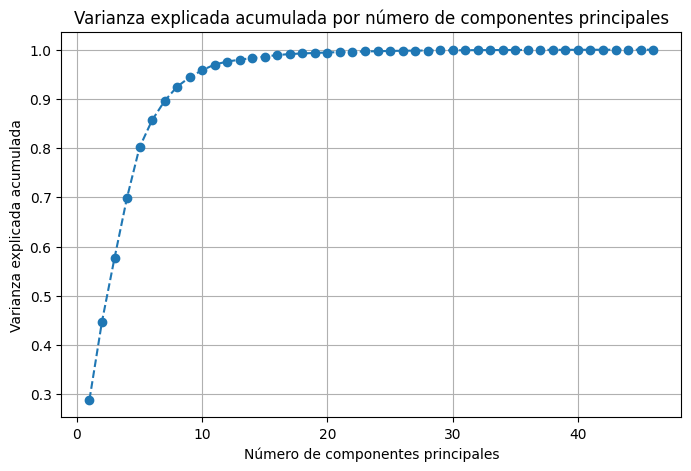

In [181]:
#Calcular la varianza explicada acumulada

data_2=data.drop('labels', axis=1)
X = StandardScaler().fit_transform(data_2)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_21496\2234185586.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


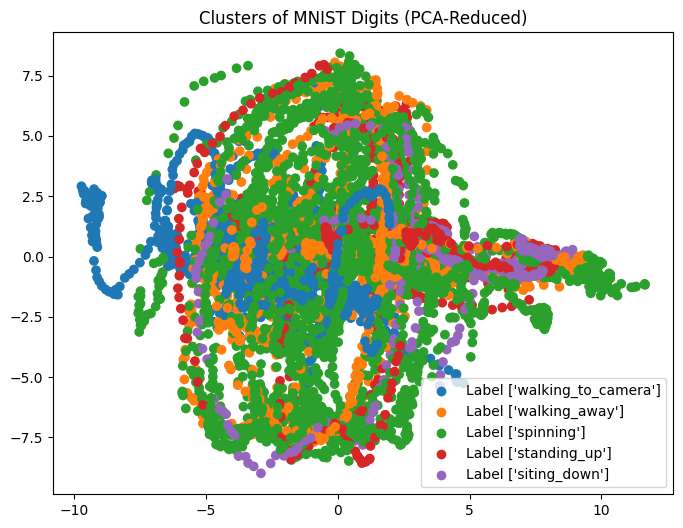

In [182]:
labels = data['labels']

data_2=data.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=8)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()


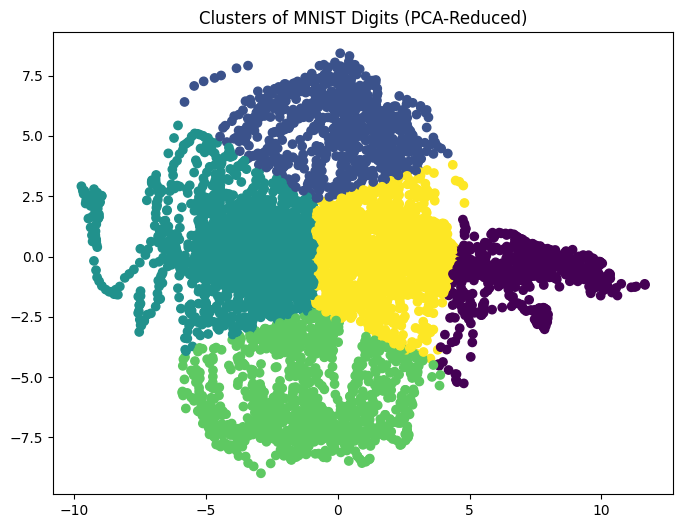

In [183]:
labels = data['labels']

data_2=data.drop('labels', axis=1)

X = StandardScaler().fit_transform(data_2)

pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=5, random_state=0,n_init=2)  # 10 clusters for 10 digits
cluster_labels = kmeans.fit_predict(reduced_data)

plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title("Clusters of MNIST Digits (PCA-Reduced)")
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_21496\377130084.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)


Text(0, 0.5, 't-SNE 2')

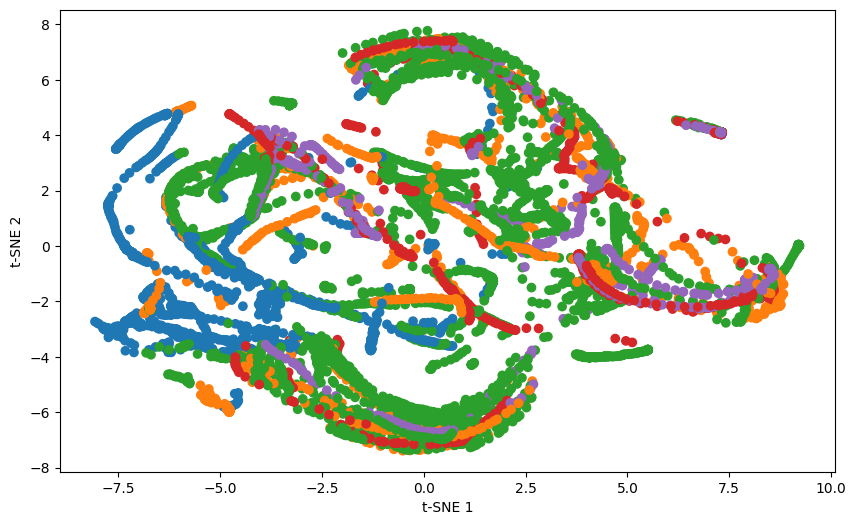

In [184]:
tsne = TSNE(n_components=2, perplexity=500, learning_rate=1, init='pca')
tsne_features = tsne.fit_transform(X)

# Plot the TSNE results without label
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

In [185]:
result_data = []

df = data.copy()
labels = df['labels'].to_numpy()
results_bundle = deque(maxlen=5)
df = df.drop(columns=['labels'])
ardf = df.to_numpy()
result_array = []
for frame in range(len(ardf)):
    if len(results_bundle) == 5:
        new_row = np.array([])
        labels_row = np.array([])
        for n in results_bundle:
            new_row = np.append(new_row, n)
            labels_row = np.append(labels_row, labels[frame])
        if len(np.unique(labels_row)) == 1:
            new_row = np.append(new_row, labels_row[0])
            result_array.append(new_row)

        results_bundle.popleft()
    results_bundle.append(ardf[frame])

    
    
result_df = pd.DataFrame(result_array)

result_df

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
0,0.5043125152587891,0.3745996356010437,-0.1616305261850357,0.9999620914459229,0.5297317504882812,0.4414572119712829,-0.0759953036904335,0.99998140335083,0.4761239886283874,0.392510175704956,...,-0.117430955171585,0.5012537837028503,0.6933073997497559,-0.1442933678627014,0.4248298704624176,0.6337550282478333,-0.117827869951725,0.07489588114915423,0.05465427218223057,['walking_to_camera']
1,0.5050994753837585,0.374491810798645,-0.0391868166625499,0.9999513626098632,0.5311768651008606,0.4382223784923553,-0.0109656145796179,0.9999821186065674,0.475839763879776,0.3927798569202423,...,-0.1090380251407623,0.4813781976699829,0.7915501594543457,0.0947197005152702,0.4363197982311249,0.7939728498458862,0.0514071434736251,0.09549576602310346,0.04818239155501645,['walking_to_camera']
2,0.5050673484802246,0.374490737915039,-0.0620638206601142,0.9999499917030334,0.5340287685394287,0.4383862316608429,0.0156893357634544,0.9999811053276062,0.466445654630661,0.3969709873199463,...,-0.1469285786151886,0.4540607333183288,0.7678857445716858,-0.237966701388359,0.4758600890636444,0.7955352067947388,-0.2418113648891449,0.04868909764090143,0.025427284734261493,['walking_to_camera']
3,0.505059540271759,0.3744957149028778,-0.0890323743224144,0.9999040961265564,0.5341129302978516,0.4317994713783264,-0.0255606193095445,0.9999803900718688,0.4701001942157745,0.3967203795909881,...,-0.0553432255983352,0.4480305314064026,0.7924901247024536,-0.1411072611808776,0.4853658080101013,0.8091349005699158,-0.1768442839384079,0.1084196071154465,0.05912353307780406,['walking_to_camera']
4,0.5050492882728577,0.3744476437568664,-0.1031782999634742,0.9998943209648132,0.5339280366897583,0.4298195540904999,-0.0423076823353767,0.9999808669090272,0.4704510867595672,0.3966580927371979,...,-0.0914876535534858,0.4476251900196075,0.7834483981132507,-0.1717757880687713,0.4981373846530914,0.8045826554298401,-0.1920829713344574,0.1135425071290856,0.06416680353606778,['walking_to_camera']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10202,0.560188889503479,0.2050684988498687,-0.4849897027015686,0.9999643564224244,0.7342144846916199,0.2936293184757232,-0.1580408662557602,0.9999526143074036,0.4513688385486603,0.3065386414527893,...,0.0042694387957453,0.6256360411643982,0.8413407802581787,0.3822174072265625,0.4527519941329956,0.8416336178779602,0.3650420010089874,0.2850705493423434,0.158178538434326,['spinning']
10203,0.5580569505691528,0.2051562964916229,-0.4877078533172607,0.9999657869338988,0.7293471097946167,0.2938799858093261,-0.175350934267044,0.9999507665634156,0.4458331763744354,0.3065425455570221,...,-0.0016130013391375,0.6256338357925415,0.8413406610488892,0.3340054750442505,0.4537196755409241,0.841784656047821,0.3353070020675659,0.28941407327333063,0.16018184555619072,['spinning']
10204,0.5571292638778687,0.2051818966865539,-0.5139697194099426,0.9999675154685974,0.724648118019104,0.2944806814193725,-0.1844359785318374,0.9999491572380066,0.4415172636508941,0.3056413233280182,...,0.0001257284166058,0.6256488561630249,0.8417317867279053,0.3255627453327179,0.4530384838581085,0.8416410088539124,0.344363272190094,0.29206985491873055,0.15872768723481062,['spinning']
10205,0.5509627461433411,0.2056425362825393,-0.5028705596923828,0.9999683499336244,0.7187872529029846,0.294489175081253,-0.1763334721326828,0.9999486207962036,0.4367047548294067,0.3051799535751343,...,-0.0061980355530977,0.6256493330001831,0.8417431116104126,0.3114565014839172,0.4536387324333191,0.8411604762077332,0.3328097462654114,0.29433098818209824,0.1596478450932591,['spinning']


In [156]:
np.array(result_array).shape

(15657, 231)

Varianza explicada por cada componente principal:
Componente 1: 0.2846
Componente 2: 0.1543
Componente 3: 0.1265
Componente 4: 0.1181
Componente 5: 0.0986
Componente 6: 0.0498
Componente 7: 0.0372
Componente 8: 0.0271
Componente 9: 0.0179
Componente 10: 0.0138
Componente 11: 0.0105
Componente 12: 0.0061
Componente 13: 0.0043
Componente 14: 0.0042
Componente 15: 0.0035
Componente 16: 0.0034
Componente 17: 0.0030
Componente 18: 0.0029
Componente 19: 0.0028
Componente 20: 0.0025
Componente 21: 0.0021
Componente 22: 0.0019
Componente 23: 0.0015
Componente 24: 0.0014
Componente 25: 0.0012
Componente 26: 0.0010


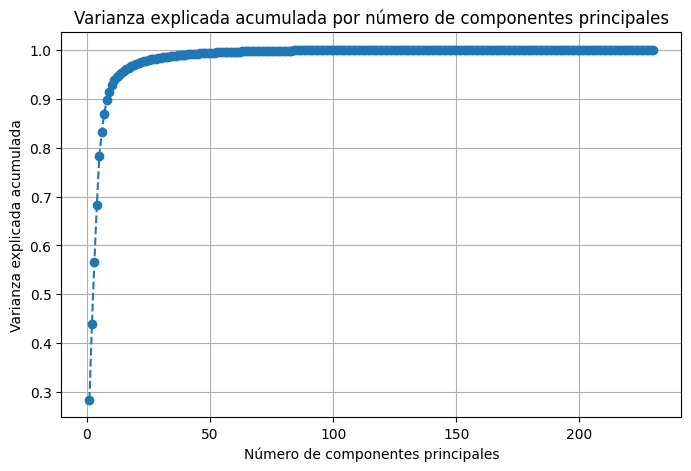

In [130]:
#Calcular la varianza explicada acumulada

data_group=result_df.drop(230, axis=1)
X = StandardScaler().fit_transform(data_group)
pca = PCA() # Reduce to 2 dimensions for visualization  # Reduce to 2 dimensions for visualization
pca.fit(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

#Imprimir la varianza explicada por cada componente principal
print("Varianza explicada por cada componente principal:")
for i, var_exp in enumerate(explained_variance_ratio):
  if var_exp > 0.001:
    print(f"Componente {i + 1}: {var_exp:.4f}")

#Graficar la varianza acumulada
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Varianza explicada acumulada por número de componentes principales')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_21496\2619855162.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}


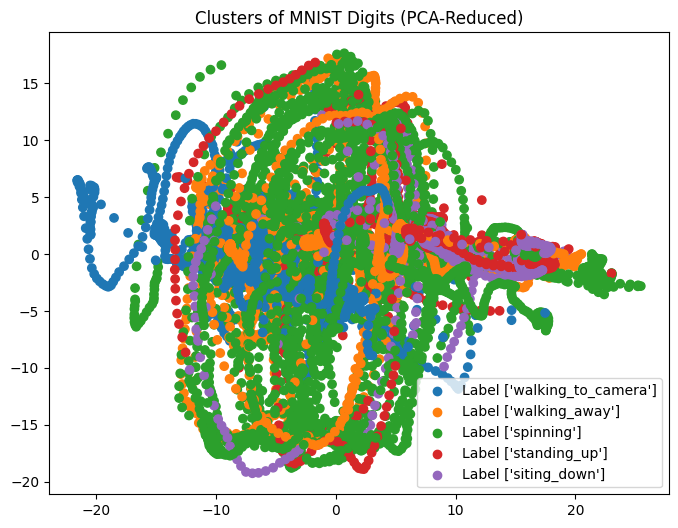

In [131]:
labels = result_df[230]

data_group=result_df.drop(230, axis=1)

X = StandardScaler().fit_transform(data_group)

pca = PCA(n_components=29)  # Reduce to 2 dimensions for visualization
reduced_data = pca.fit_transform(X)

# Create a color map for each unique label
unique_labels = labels.unique()
label_colors = {label: plt.cm.get_cmap('tab10')(i) for i, label in enumerate(unique_labels)}

# Assign colors to data points based on their labels
colors = [label_colors[label] for label in labels]


plt.figure(figsize=(8, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=colors)
plt.title("Clusters of MNIST Digits (PCA-Reduced)")

# Create a legend to show which color represents each label
for label, color in label_colors.items():
  plt.scatter([], [], color=color, label=f'Label {label}')

plt.legend()
plt.show()

C:\Users\camic\AppData\Local\Temp\ipykernel_21496\4192807430.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)


Text(0, 0.5, 't-SNE 2')

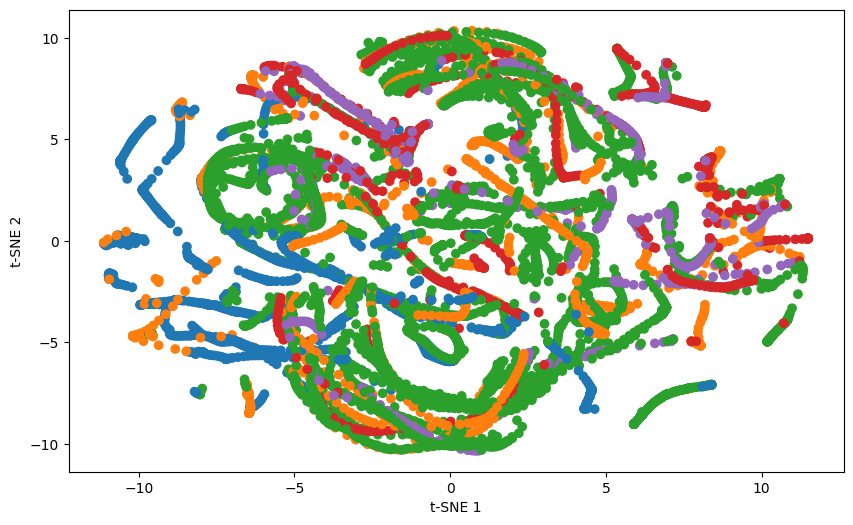

In [132]:
tsne = TSNE(n_components=2, perplexity=50, learning_rate=1, init='pca')
tsne_features = tsne.fit_transform(X)

# Plot the TSNE results without label
plt.figure(figsize=(10, 6))
plt.scatter(tsne_features[:, 0], tsne_features[:, 1], cmap='viridis', c=colors)
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

In [186]:
result_df.to_csv("datos_procesados.csv")

In [ ]:
# Normalize the columns and save the values they were divided by
normalization_factors = {}
result_df.iloc[:, :-1] = result_df.iloc[:, :-1].astype(float)
for column in result_df.columns:
    if(column == 230):
        continue
    max_value = result_df[column].max()
    if (max_value >1):
        normalization_factors[column] = max_value
        result_df[column] = result_df[column] / max_value
    else:
        normalization_factors[column] = 1
        result_df[column] = result_df[column] / 1

# Save the normalization factors to a CSV file
normalization_factors_df = pd.DataFrame(list(normalization_factors.items()), columns=['Column', 'Normalization Factor'])
normalization_factors_df.to_csv('normalization_factors.csv', index=False)

# Save the normalized dataframe to a CSV file
result_df.to_csv('normalized_result_df.csv', index=False)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Transform labels into a numeric variable
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(labels)

x_train, x_test, y_train, y_test = train_test_split(X, numeric_labels, test_size=0.2, random_state=42)

model = XGBClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)


accuracy = accuracy_score(y_test, y_pred)

In [23]:

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Exactitud del modelo:", accuracy)
print("\nMatriz de Confusión:\n", conf_matrix)
print("\nReporte de Clasificación:\n", class_report)

Exactitud del modelo: 0.964414646725116

Matriz de Confusión:
 [[170   7   0   0   1]
 [  0 897   2   3   4]
 [  1   5 185   5   4]
 [  0  14   1 319   7]
 [  1  10   2   2 299]]

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.99      0.96      0.97       178
           1       0.96      0.99      0.98       906
           2       0.97      0.93      0.95       200
           3       0.97      0.94      0.95       341
           4       0.95      0.95      0.95       314

    accuracy                           0.96      1939
   macro avg       0.97      0.95      0.96      1939
weighted avg       0.96      0.96      0.96      1939

